In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt

from matplotlib.colors import BoundaryNorm
import matplotlib.colors as colors
from scipy import signal

import demo_common
%matplotlib notebook

In [2]:
#### create ram DISK
# sudo mkdir /mnt/tmpfs/
# sudo chmod 777 /mnt/tmpfs/
# sudo mount -t tmpfs -o size=300M tmpfs /mnt/tmpfs

## in /etc/fstab
#tmpfs /mnt/tmpfs tmpfs defaults,size=500M 0 0

### Get all MP3 files in path

In [3]:
mp3_files = []
def get_mp3_files(path):
    for path, dirs, files in os.walk(path):
        for d in dirs:
            get_mp3_files(os.path.join(path, d) )
        for f in files:
            if not f.endswith('.mp3'):
                continue
            mp3_file = os.path.join(path, f)
            mp3_files.append(mp3_file)
            
get_mp3_files('/home/oscil/Downloads/')

In [67]:
out_file_name = demo_common.convert2wav(mp3_files[0], freq = 44100, mono=True)
params, samples = demo_common.read_wav(out_file_name)
samples = samples[0]

fft_samples = 2048
fft_overlap = 1024

f, t, Sxx = signal.spectrogram(samples, 
                               params['framerate'], 
                               nperseg = fft_samples, 
                               noverlap = fft_overlap)

chunk_size_sec = 30
freq_chunks_in_second = 44100/(fft_samples - fft_overlap)

spec_sums = []

cur_sum = None
last_chunk_t = 0
for idx in range(len(t)):
    if (t[idx] - last_chunk_t)//chunk_size_sec:
        spec_sums.append( {'t':last_chunk_t, 's':cur_sum/cur_sum.max()} )
        last_chunk_t = t[idx]
        cur_sum = None
    else:
        if cur_sum is None:
            cur_sum = Sxx.T[idx]
        else:
            cur_sum += Sxx.T[idx]

{'nchannels': 1, 'sampwidth': 2, 'framerate': 44100, 'nframes': 22583904, 'comptype': 'NONE', 'compname': 'not compressed'}


In [66]:
# fig, ax = plt.subplots()
# pcm = ax.pcolormesh(t, f, Sxx, norm=colors.PowerNorm(gamma=1./5.) )
# fig.colorbar(pcm, ax=ax, extend='max')

<IPython.core.display.Javascript object>


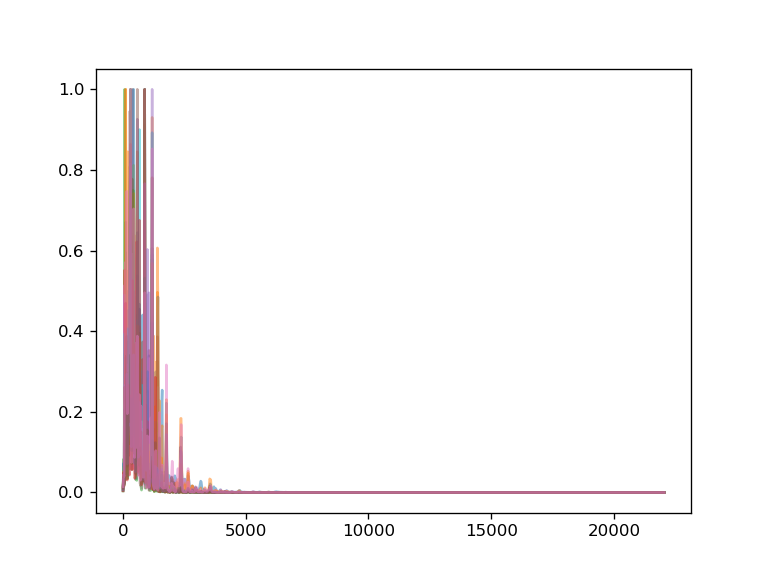

In [68]:
fig, ax = plt.subplots()
for idx in range(len(spec_sums)):
    ax.plot(np.linspace(0,44100/2,len(spec_sums[idx]['s'])),  spec_sums[idx]['s'], alpha=0.5)
